In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [9]:
gold_data = pd.read_csv("/Users/ajaykrisna/Desktop/goldprice.csv")
gold_data.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [10]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [11]:
gold_data.shape

(2290, 6)

In [12]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [13]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<AxesSubplot:>

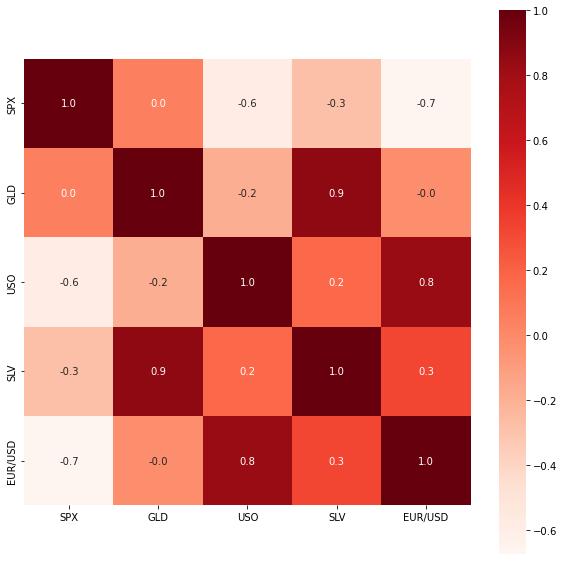

In [14]:
correlation = gold_data.corr()
plt.figure(figsize =(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt ='.1f', annot=True, annot_kws={'size':10}, cmap='Reds')

In [15]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<AxesSubplot:xlabel='GLD', ylabel='Count'>

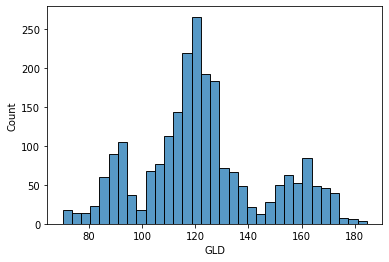

In [16]:
sns.histplot(gold_data['GLD'])

In [17]:
X = gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [18]:
X_train, X_test, Y_train , Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [19]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,Y_train)


RandomForestRegressor()

In [20]:
testdataprediction = regressor.predict(X_test)
print(testdataprediction)

[168.46479937  81.90109979 115.7404001  127.63320067 120.62560132
 154.80039777 150.05959923 126.0926006  117.53449876 126.32310013
 116.843801   170.3751007  141.42069888 167.41169801 115.24200004
 117.71740056 139.1618033  170.35730154 159.43390399 160.32309988
 155.1650004  125.40390047 175.63549999 157.7082033  125.29860034
  93.98160003  77.45239996 120.48690033 119.15209944 167.55549985
  88.20110038 125.33970042  91.00080086 117.61300017 121.07389929
 136.46550082 115.3771011  115.18840076 146.2632997  107.12070077
 104.60020262  87.17209807 126.39190059 118.0830002  153.03389846
 119.60069994 108.4966997  108.20389813  93.21470049 127.01169794
  74.83080068 113.58619917 121.22680021 111.22909879 118.87249894
 120.69849951 158.93180001 167.81720153 147.05689696  85.85779831
  94.20780027  86.83029871  90.64639998 119.0160006  126.39330068
 127.60369957 171.09420043 122.22439967 117.30159878  98.70160062
 167.90780066 143.24529882 132.03730211 121.1382021  121.3379995
 119.723500

In [23]:
errorscore = metrics.r2_score(Y_test,testdataprediction)
print("The R squared error is", errorscore)

The R squared error is 0.9892879849743222


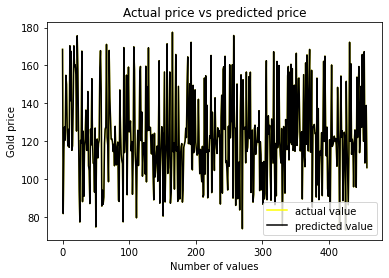

In [22]:
Y_test = list(Y_test)
plt.plot(testdataprediction, color='yellow' , label='actual value')
plt.plot(testdataprediction, color='black', label='predicted value')
plt.title('Actual price vs predicted price')
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()